# The Family Dataset
This script inspects the family dataset to find out more about what is in there

In [1]:
from pykeen.triples import TriplesFactory
import torch 
import numpy as np

In [2]:
all_triples = TriplesFactory.from_path('all.txt')
train = TriplesFactory.from_path('train.txt', entity_to_id=all_triples.entity_to_id,
                                 relation_to_id=all_triples.relation_to_id,
                                 create_inverse_triples=False)
valid = TriplesFactory.from_path('valid.txt', entity_to_id=all_triples.entity_to_id,
                                 relation_to_id=all_triples.relation_to_id)
test = TriplesFactory.from_path('test.txt', entity_to_id=all_triples.entity_to_id,
                                relation_to_id=all_triples.relation_to_id)

In [3]:
print(f"Train: {train}")
print(f"Valid: {valid}")
print(f"Test: {test}")

Train: TriplesFactory(num_entities=3007, num_relations=12, create_inverse_triples=False, num_triples=5868, path="/Users/werner/PycharmProjects/nesy_benchmark/datasets/family/train.txt")
Valid: TriplesFactory(num_entities=3007, num_relations=12, create_inverse_triples=False, num_triples=2038, path="/Users/werner/PycharmProjects/nesy_benchmark/datasets/family/valid.txt")
Test: TriplesFactory(num_entities=3007, num_relations=12, create_inverse_triples=False, num_triples=2835, path="/Users/werner/PycharmProjects/nesy_benchmark/datasets/family/test.txt")


## Relation types 

In [24]:
print(all_triples.relation_to_id)

{'aunt': 0, 'brother': 1, 'daughter': 2, 'father': 3, 'husband': 4, 'mother': 5, 'nephew': 6, 'niece': 7, 'sister': 8, 'son': 9, 'uncle': 10, 'wife': 11}


## Count triples per relation

Count occurrences of relations in all.txt:
aunt, 2990
brother, 3076
daughter, 1589
father, 2010
husband, 1138
mother, 1714
nephew, 3633
niece, 2815
sister, 2658
son, 2110
uncle, 3485
wife, 1138

Number of triples in all.txt: 28356


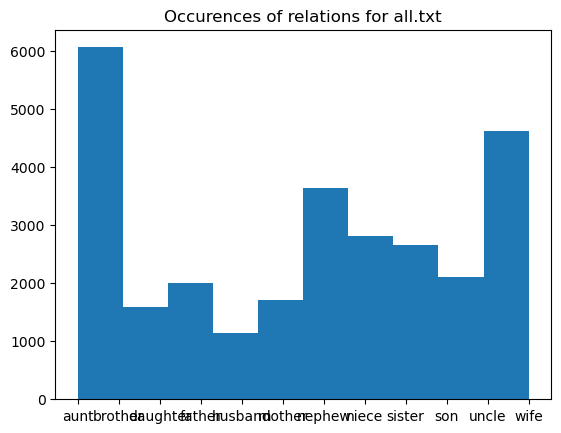

In [25]:
import matplotlib.pyplot as plt
def count_rels(filename, plot=False): 
    """counts occurrence of relations and plots it as histogram """
    _triples = open(filename).readlines()
    edge_index, edge_type = [], []
    for line in _triples:
        head, relation, tail = line.split('\t')
        if tail.endswith('\n'):
            tail = tail[:-1]
        edge_index.append([int(head), int(tail)])
        edge_type.append(relation)
    
    print(f'Count occurrences of relations in {filename}:')
    val, cnt = [], []
    for v in sorted(set(edge_type)):
        print(f'{v}, {edge_type.count(v)}')
        val.append(v)
        cnt.append(edge_type.count(v))
    if plot:
        plt.hist(val, weights=cnt)
        plt.title(f'Occurences of relations for {filename}')
    print(f'\nNumber of triples in {filename}: {len(_triples)}\n\n')

count_rels('all.txt', plot=True)

In [26]:
count_rels('train.txt', plot=False)

Count occurrences of relations in train.txt:
aunt, 622
brother, 633
daughter, 325
father, 412
husband, 239
mother, 352
nephew, 757
niece, 578
sister, 552
son, 440
uncle, 721
wife, 237

Number of triples in train.txt: 5868


In [27]:
count_rels('valid.txt', plot=False)

Count occurrences of relations in valid.txt:
aunt, 216
brother, 220
daughter, 113
father, 143
husband, 83
mother, 122
nephew, 263
niece, 201
sister, 192
son, 153
uncle, 250
wife, 82

Number of triples in valid.txt: 2038


In [28]:
count_rels('test.txt', plot=False)

Count occurrences of relations in test.txt:
aunt, 286
brother, 321
daughter, 173
father, 219
husband, 99
mother, 184
nephew, 341
niece, 301
sister, 255
son, 197
uncle, 351
wife, 108

Number of triples in test.txt: 2835


# One-to-many relations ?

In [33]:
for i, rel in enumerate(all_triples.relation_to_id.keys()):    
    idx= all_triples.mapped_triples[:, 1] == all_triples.relation_to_id[rel]
    _triples = all_triples.mapped_triples[idx]
    m_heads = _triples[:, 0]
    m_tails = _triples[:, 2]
    unique_heads = torch.unique(m_heads)
    print('\n')
    print(f"{i}. Relation <{rel}>")
    print(f"Number of unique heads with relation <{rel}> : {len(unique_heads)}")
    unique_tails = torch.unique(m_tails)
    print(f"Number of unique heads with relation <{rel}> : {len(unique_tails)}")
    heads = {}
    tails = {}
    for head in unique_heads:
        heads[head.item()] = len(_triples[_triples[:, 0] == head])
    for tail in unique_tails:
        tails[tail.item()] = len(_triples[_triples[:, 2] == tail])
    print("################################# Heads #################################")
    print(f"(head, <{rel}>, tail) - One head has minimum {min(heads.values())} different tails")
    print(f"(head, <{rel}>, tail) - One head has in average {sum(heads.values())/len(heads.values())} different tails")
    print(f"(head, <{rel}>, tail) - One head has median {np.median(list(heads.values()))} different tails")
    print(f"(head, <{rel}>, tail) - One head has maximum {max(heads.values())} different tails")
    print("################################# Heads #################################")
    print(f"(head, <{rel}>, tail) - One head has minimum {min(tails.values())} different heads")
    print(f"(head, <{rel}>, tail) - One head has in average {sum(tails.values())/len(tails.values())} different heads")
    print(f"(head, <{rel}>, tail) - One head has median {np.median(list(tails.values()))} different heads")
    print(f"(head, <{rel}>, tail) - One head has maximum {max(tails.values())} different heads")
    



0. Relation <aunt>
Number of unique heads with relation <aunt> : 428
Number of unique heads with relation <aunt> : 1034
################################# Heads #################################
(head, <aunt>, tail) - One head has minimum 1 different tails
(head, <aunt>, tail) - One head has in average 6.985981308411215 different tails
(head, <aunt>, tail) - One head has median 5.0 different tails
(head, <aunt>, tail) - One head has maximum 40 different tails
################################# Heads #################################
(head, <aunt>, tail) - One head has minimum 1 different heads
(head, <aunt>, tail) - One head has in average 2.8916827852998064 different heads
(head, <aunt>, tail) - One head has median 3.0 different heads
(head, <aunt>, tail) - One head has maximum 11 different heads


1. Relation <brother>
Number of unique heads with relation <brother> : 811
Number of unique heads with relation <brother> : 1246
################################# Heads ####################


## We can summarize on the relations: 

### Aunt: many-to-many
> a person can have several aunts
a person can be aunt for several other people
theoretically and empirially 

### Brother: many-to-many
> a person can have several brothers
a person can be brother for several people. 
theoretically and empirically 

### Daughter: many-to-two
> a person can have several daughters
a person can be daughter for maximum two people

### Father: one-to-many relation
> a person has only one father
a person can be father for several people

### Husband: one-to-one
> a person can have one husband
a person can be husband for one person
(some empirical exceptions in data)

### Mother: one-to-many relation
> a person has only one mother
a person an be mother for several people

### Nephew : many-to-many 
> a person can have several nephews
a person can be nephew to several

### Niece: many-to-many 
> a person can have several nieces
a person can be niece to several

### Sister: many-to-many
> a person can have several sisters
a person can be sister to several

### Son: many-to-two
> a person can have several sons
a person can be the son of only two people 

### Uncle: many-to-many
> a person can have several uncles
a person can be uncle to several people

### Wife: one-to-one
> a person can have one wife
a person can be the wife of several people
(some exceptions in the data) 

The relations are read as follows : Aunt(x,y) = x is aunt of y. Aunt = "isAuntOf"
